<Body>   
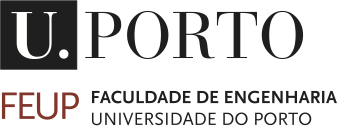   
<h1> <b>Assignment 2  - 2023/2024 </b> </h1>

</Body>  
---


# Introduction

In this assignment, you will encounter both pen-and-paper exercises and coding tasks to be solved using Python 3 and the NumPy library. To complete each exercise, utilize the designated cell within this Jupyter notebook.

For the pen-and-paper exercises, you have the option to submit either a typeset solution or a good-quality digitalized version of your handwritten solution.

As for the Python exercises:

- Refrain from altering the provided code; simply fill in the missing portions as indicated.
- Do not use any additional libraries beyond those already included in the code.
- Make sure that the output of all code cells is visible in your submitted notebook. The evaluator will NOT execute your code before grading your submission.
   
Please identify the authors of this assignment in the cell below.

### Author 1: Name, UP number
### Author 2: Name, UP number
### Author 3: Name, UP number

# **Activity 1** - Generative and Discriminative Classifiers

Consider a two-dimensional class problem with two classes ($C_1$ and $C_2$), characterized by Gaussian distributions with means $\mu_1=\left(1,0\right)^\top$ and $\mu_2=\left(2,1\right)^\top$, and covariances
$\Sigma_1 = \Sigma_2 = \left[\begin{array}{cc} 1 & -0.9 \\ -0.9 & 2\end{array}\right]$, respectively. Assume the classes are equiprobable.




## **1.1** Obtain a dataset consisting from $100$ points from each class and plot the data. Estimate the two models (MLE) using only this data.

Model 1: [0.85496804 0.22213309]    [[ 0.81274014 -0.76530586]
 [-0.76530586  2.02275808]]
Model 2: [1.89003621 1.12393985]    [[ 0.95397578 -0.89877316]
 [-0.89877316  1.75275702]]


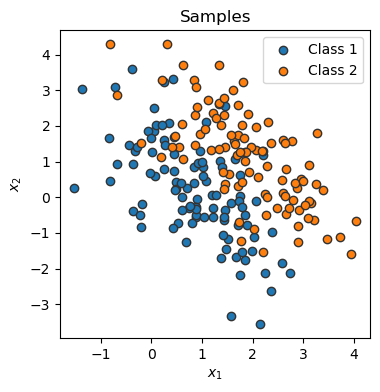

In [3]:
# Activity 1.1 (to be completed)

import numpy as np
import matplotlib.pyplot as plt

## Visualize the data considering two classes
def visualize_samples(data, label):
    data_1 = data[label == 1]
    data_2 = data[label == 2]

    plt.figure(figsize=(4,4))
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.scatter(data_2[:,0], data_2[:,1], edgecolor="#333", label="Class 2")
    plt.title("Samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend(loc="upper right")


## to make sure we have always the same data
np.random.seed(10)

## Distribution for class 1
mu_1 = np.array([1,0])
sigma_1 = np.array([[1, -0.9], [-0.9, 2]])

## Distribution for class 2
mu_2 = np.array([2,1])
sigma_2 = np.array([[1, -0.9], [-0.9, 2]])

# Sample from class distributions
size_1 = 100
size_2 = 100
size_total = size_1 + size_2
X_1 = np.random.multivariate_normal(mu_1,sigma_1,size_1)
X_2 = np.random.multivariate_normal(mu_2,sigma_2,size_2)
X   =  np.concatenate([X_1, X_2], axis = 0)
Y   =  np.concatenate((np.ones(size_1), np.ones(size_2)*2), axis = 0).flatten()

#Estimate the Models
mu_measured_1    = np.mean(X_1, axis = 0)
mu_measured_2    = np.mean(X_2, axis = 0)
sigma_measured_1 = np.cov(X_1,rowvar = False)
sigma_measured_2 = np.cov(X_2, rowvar = False)

print("Model 1:", mu_measured_1, "  ", sigma_measured_1)
print("Model 2:", mu_measured_2, "  ", sigma_measured_2)

#Show data
visualize_samples(X, Y)

## **1.2** Assign each point of the dataset to either $C_1$ or $C_2$, according to the Bayes decision rule. Estimate the classification probability error and plot the classification regions.


Classification probability error: 0.125


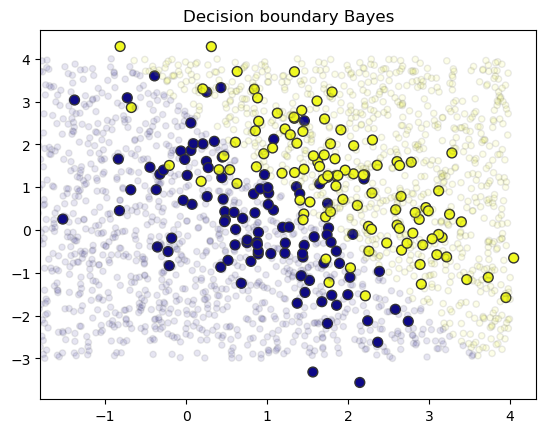

In [4]:
# Activity 1.2 (to be completed)

## multivariate gaussian distribution
def gaussian(x, mean, cov):
    n = mean.size
    d = x-mean
    np.reshape(d,[n,1])
    exp_term = -0.5*(((x-mean).T )@ (np.linalg.inv(cov) @ (x-mean)))
    f_term = 1.0/((2*np.pi)**(n/2)*(np.linalg.det(cov)**0.5))
    pdf = f_term * np.exp(exp_term)
    return pdf

## Bayes Prediction
def prediction_bayes(X, mu_1, sigma_1, mu_2, sigma_2, Prior_C1, Prior_C2):
  classification = []

  for x in X:
    Prob_C1 = Prior_C1 * gaussian(x, mu_1, sigma_1)
    Prob_C2 = Prior_C2 * gaussian(x, mu_2, sigma_2)


    if Prob_C1 > Prob_C2:
       classification.append(1)
    else:
       classification.append(2)
  return classification


## calculate the classification probability error
def calculate_error (preditor, label):
  Pe= 0
  size_sample = len(preditor)
  
  if size_sample != len(label):
    raise ValueError("Lengths of predictor and labels must be the same.")
  misclassified_count = np.sum(preditor != label)
  Pe = misclassified_count / size_sample
  
  return Pe

## A priori probabilities
P_class1 = 0.5
P_class2 = 0.5

## classify each data point (using Bayesian classification theorem)
prediction = prediction_bayes(X, mu_1, sigma_1, mu_2, sigma_2, P_class1, P_class2)

## calculate classification error
Pe = calculate_error(prediction, Y)
print('Classification probability error:', Pe)


# plot classification regions and points
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [6, 7] * rng.rand(2000, 2) # generate a large number of points
ynew = prediction_bayes(Xnew, mu_measured_1, sigma_measured_1, mu_measured_2, sigma_measured_2, P_class1, P_class2)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor="#333", cmap="plasma")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, edgecolor="#333", cmap="plasma", alpha=0.1)
plt.axis(lim)
plt.title("Decision boundary Bayes")
plt.show()

## **1.3** Assign each point of the dataset to either $C_1$ or $C_2$, using the Naive Bayes classifier. Estimate the classification probability error and plot the classification regions.

Classification probability error Naive Bayes: 0.2


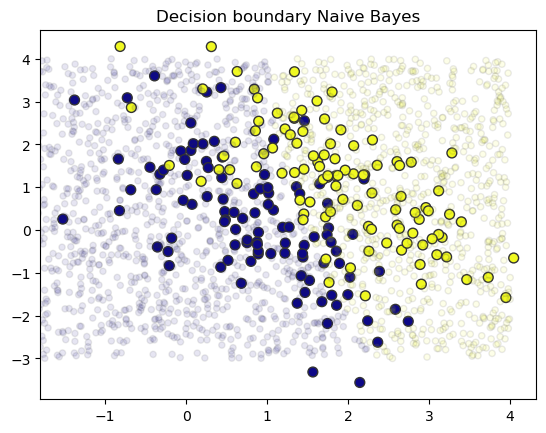

In [23]:
# Activity 1.3 Naive (to be completed)

## 1D normal distribution
def gaussian1d(x, mean, var):
    pdf = 1/(np.sqrt(var*2*np.pi))*np.exp(-0.5*((x-mean)**2)/var)
    return pdf


## Naive Bayes Prediction
def prediction_naive_bayes(X, mu_1, sigma_1, mu_2, sigma_2, Prior_C1, Prior_C2):
  classification = []
  
  
  for x in X:
     Likelihood_1 = 1
     Likelihood_2 = 1
     for i in range(len(x)):
      Likelihood_1 *= gaussian1d(x[i], mu_1[i], sigma_1[i,i]**2)
      Likelihood_2 *= gaussian1d(x[i], mu_2[i], sigma_2[i,i]**2)

     Prob_1 = Likelihood_1 * Prior_C1
     Prob_2 = Likelihood_2 * Prior_C2

     if Prob_1 > Prob_2:
        classification.append(1)
     else:
        classification.append(2)
  return classification


# A priori probabilities
P_class1 = size_1 / (size_1 + size_2)
P_class2 = size_2 / (size_1 + size_2)


# classify each data point (using Bayesian classification theorem)
prediction = prediction_naive_bayes(X, mu_1, sigma_1, mu_2, sigma_2, P_class1, P_class2)


# calculate classification error
Pe = calculate_error(prediction, Y)
print('Classification probability error Naive Bayes:', Pe)


# plot classification regions and points
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [6, 7] * rng.rand(2000, 2) # generate a large number of points
ynew = prediction_naive_bayes(Xnew, mu_measured_1, sigma_measured_1, mu_measured_2, sigma_measured_2, P_class1, P_class2)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor="#333", cmap="plasma")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, edgecolor="#333", cmap="plasma", alpha=0.1)
plt.axis(lim)
plt.title("Decision boundary Naive Bayes")
plt.show()


## **1.4** Consider the loss matrix $L=\left[\begin{array}{cc} 0 & 1 \\ 0.09 & 0\end{array}\right]$. Assign each point of the dataset to $C_1$ or $C_2$ according to the average risk minimization rule and the Bayes decision rule (not the Naive Bayes). Plot the points with different colors, depending on the class they are assigned to. Estimate the average risk for this loss matrix.


In [ ]:
# Activity 1.4 (to be completed)

## loss matrix entries
L_risk = np.array([[0, 1], [0.09, 0]])

## Bayes classifier using risk matrix
def prediction_bayes_risk(X, mu_1, sigma_1, mu_2, sigma_2, Prior_C1, Prior_C2, Risks):
  classification = []
  L12 = Risks[0, 1]
  L21 = Risks[1, 0]
  # ...
  # ...
  return classification

## Calculate the average risk
def calc_average_risk(predition, label, Risks):
  Ar  = 0
  L12 = Risks[0, 1]
  L21 = Risks[1, 0]
  # ...
  # ...
  Ar = Ar/size_total
  return Ar

## A priori probabilities
#P_class1 = ...
#P_class2 = ...

## classify each data point considering the risk
#predition = ...

## calculate classification error
#Pe        = ...
print('Classification probability error using Risk:', Pe)


# determine average risk
#Ar = ...
print('Average risk:', Ar)


# plot classification regions and points
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [6, 7] * rng.rand(2000, 2) # generate a large number of points
#ynew = prediction_bayes_risk(Xnew, ...

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor="#333", cmap="plasma")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, edgecolor="#333", cmap="plasma", alpha=0.1)
plt.axis(lim);
plt.title("Decision boundary")
plt.show()

## **1.5**: justify if the Bayesian classification is in fact equivalent to the minimization of the Mahalanobis distance for this particular case. Provide the assumptions that were considered during your analysis.



> SOLUTION for this theoretical exercise:

Assumptions:

i) Complete HERE...

ii) Complete HERE...

iii) Complete HERE...


Provide HERE your deduction...



## **1.6** Perform logistic regression and use the data set to estimate the involved parameter vector $w$. Evaluate the classification error of the resulting classifier and plot the decision boundary.







In [ ]:
# Activity 1.6 (to be completed)

#Sigmoid function
def sig(p):
  # ...

## Gradient
def nabla_f(w, x, y):
  #...

### Gradient Descent technique
def logisticregression_gradient_descent(w,x,y, lam = 0.001, TOL = np.power(10.,-8), max_iter = 1000):
  """
  w        - (D+1) model vector for gradient descent iteration
  x        - (nxD+1) input features
  y        - (nx1) label vector (0 or 1 values)
  lam      - (scalar) learning rate
  TOL      -  (scalar) stoping criteria - maximum tolerance used in the gradient convergency
  max_iter -  (scalar) stoping criteria - maximum iteration

  returns
  w       - (D+1) model vector
  count   - number of iterations needed

  """
  #...
  #...
  return w, counter

In [ ]:
# Prepare data
X_data = np.concatenate((np.array([np.ones(X.shape[0])]).T, X), axis = 1)
Y      = Y.reshape((len(Y), 1))
W      = np.matrix(np.ones(X_data.shape[1])*0.1).T

# Classes should be 0 or 1 to match the sigmoid function.
Y_log = Y - 1

### Gradient Descent:
#W_gd, counter = ...
print('Solution W gd = ', W_gd)

# Classify using the Logistic Regression model
#predition_logistic_gd = ...

# calculate Error
print("Error Logistic Regression is:", calculate_error(predition_logistic_gd, Y))

In [ ]:
## confirm results using sklearn:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#clf = ...
np.set_printoptions(suppress=True)
print('Logistic regression sklearn, W0 = ', clf.intercept_)
print('Logistic regression sklearn, W = ', clf.coef_)

X_data = np.concatenate((np.array([np.ones(X.shape[0])]).T, X), axis = 1)
#Y      = ...
#W      = ...

#predition_logistic_sk = ...
print("Error Sk Logistic Regression is:", calculate_error(predition_logistic_sk, Y))

In [ ]:
# plot classification regions and points
rng = np.random.RandomState(0)
Xnew = [-2, -3] + [6, 7] * rng.rand(2000, 2) # generate a large number of points
Xnew = np.concatenate((np.array([np.ones(Xnew.shape[0])]).T, Xnew), axis = 1)
ynew = (sig(Xnew @ W.T) > 0.5).astype(int)  + 1

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=predition_logistic_sk, s=50, edgecolor="#333", cmap="plasma")
lim = plt.axis()
plt.scatter(Xnew[:, 1], Xnew[:, 2], c=ynew, s=20, edgecolor="#333", cmap="plasma", alpha=0.1)
plt.axis(lim);
plt.title("Decision boundary")
plt.show()

----------------------

It's done!